### Q1) KNeighborsClassifier를 이용한 정확도를 리턴받자.  

In [1]:
# 당뇨 발생 유무를 예측하기 위해 임신횟수, 혈당, 혈압을 사용할 경우 정확도를 확인 하자. 
# "Pregnancies", "Glucose", "BloodPressure"  ->X
# "Outcome"   -> y 
from sklearn.model_selection import train_test_split
from sklearn.metrics      import accuracy_score
from sklearn.neighbors  import KNeighborsClassifier
import pandas as pd

# 데이터 로드  
df= pd.read_csv('data/diabetes.csv')

#데이터 분류 
df_train, df_test = train_test_split(df, train_size =0.8 , random_state = 123)

# 모델 생성 
model  = KNeighborsClassifier() 

X  = df_train.loc[:, ["Pregnancies", "Glucose", "BloodPressure"]]
y  = df_train["Outcome"] 

#모델 실행  -> 학습데이터  
model.fit(X,y)

#예측   -> 테스트 데이터  
pred = model.predict(df_test.loc[:,["Pregnancies", "Glucose", "BloodPressure"]])
pred[:5] #확인  

#정확도   ->  예측값,  실제값이 값이 없어서 df_test 값으로  .. 
accuracy_score(y_pred = pred, y_true = df_test["Outcome"])


0.7467532467532467

### Q2) 종속변수를 당뇨 발생 유무, 임신유무,혈당,혈압, 인슐린, 체질량 지수를 독립으로 하여 
### 정확도를 확인 했을 때 K값과 정확도는?   학습 8: 평가 2

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics      import accuracy_score
from sklearn.neighbors  import KNeighborsClassifier
import pandas as pd

# 1. 데이터 로드  
df= pd.read_csv('../../data/diabetes.csv')

#2. 임신회수가 있고 임신의 유무가 없다.  컬럼 추가. 
df['is_preg'] = (df['Pregnancies'] > 0 ) +0
df.head()

#3.  데이터 분류 
df_train, df_test = train_test_split(df, train_size =0.8 , random_state = 123)
X_cols = ['is_preg', 'Glucose', 'BloodPressure', 'Insulin', 'BMI']

neighbors =[3,5,10,11,20,25,30]
accs =[] 
for k in neighbors:
    model   =  KNeighborsClassifier(n_neighbors=k)   # 모델 생성  
    model.fit(X=df_train.loc[:, X_cols] , y=df_train['Outcome'])  #모델 실행 
    
    pred = model.predict(df_test.loc[:, X_cols]) #예측값
    acc_sub = accuracy_score(y_pred = pred, y_true= df_test['Outcome'] ) #정답 스코어 
    accs= accs +[acc_sub]
    
#4.출력결과 
df_score  = pd.DataFrame({'neighbors':neighbors,  'accs' :accs  })
df_score['accs']= df_score['accs'].round(2)
df_score

# k=11, 정확도 0.81 

,neighbors,accs
0,3,0.71
1,5,0.73
2,10,0.78
3,11,0.81
4,20,0.76
5,25,0.74
6,30,0.77


### Q3) 종속변수를 체질량 지수로 하고 , 임신유무,혈당,혈압, 인슐린 독립으로 하여 K, RMSE는 ?
RMSE  -> mean_squared_error()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics      import accuracy_score
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# 1. 데이터 로드  
df= pd.read_csv('../../data/diabetes.csv')

#2. 임신회수가 있고 임신의 유무가 없다.  컬럼 추가. 
df['is_preg'] = (df['Pregnancies'] > 0 ) +0
df.head()

#3.  데이터 분류 
df_train, df_test = train_test_split(df, train_size =0.8 , random_state = 123)
X_cols = ['is_preg', 'Glucose', 'BloodPressure', 'Insulin']

neighbors =[3,5,10,11,20,25,30]
rmses =[] 
for k in neighbors:
    model   =  KNeighborsRegressor(n_neighbors=k)   # 모델 생성  
    model.fit(X = df_train.loc[:, X_cols], y = df_train["BMI"])  #모델 실행 
    
    pred = model.predict(df_test.loc[:, X_cols]) #예측값
    rmse_sub = np.sqrt(mean_squared_error(y_pred = pred, y_true = df_test["BMI"])) #정답 스코어
    rmses= rmses +[rmse_sub]
    
#4.출력결과 
df_score = pd.DataFrame({"neighbors": neighbors, "rmses": rmses})
df_score["rmses"] = df_score["rmses"].round(3)
df_score

,neighbors,rmses
0,3,8.508
1,5,8.706
2,10,8.517
3,11,8.467
4,20,8.514
5,25,8.449
6,30,8.436


In [6]:
print(help(KNeighborsClassifier ))

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

### Q4) KNeighborsClassifier를 이용한 정확도를 리턴받자.
## load_iris() 를 이용해서 분류 작업

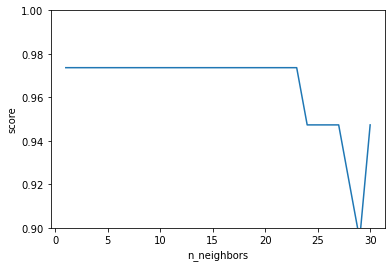

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

#1 . 데이터 로드
iris = load_iris()
X = iris.data
y= iris.target

#2. 데이터 확인  
#print("데이터 수 = %d 특징량 = %d" % (X.shape[0], X.shape[1])) #(150,4) 
pd.DataFrame(X, columns=iris.feature_names).head()

# 데이터 표시(목적 변수)
#print("데이터 수 = %d" % (y.shape[0]))
#print(y)

#3. 데이터 분할
X_train, X_test, y_train,y_test  = train_test_split(X,y, random_state = 0) 
#4.분류 모형 
list_nn =[]
list_score =[]
for k in range(1,31) : # 1~30 
    model = KNeighborsClassifier(n_neighbors =  k)
    model.fit(X_train, y_train)  # 학습 데이터로  모델 실행     
    y_pred  = model.predict(X_test)  # 테스트 데이터로 예측    
    score  = model.score(X_test, y_test) # 테스트 데이터로 평가 -> R2값이 1이면 완벽예측 , 0이면 평균
                                         # 분류 -> score  -> accuracy_score랑 같다.  
    #print("[%d] score: {:.2f}".format(score) % k)
    
    list_nn.append(k)
    list_score.append(score)
    
#5. 시각화      
plt.ylim(0.9,1.0)   ; 
plt.xlabel('n_neighbors');
plt.ylabel('score');
plt.plot(list_nn, list_score);
#[평가 ]  k =1~30 /  k 1~23까지는 정밀도 97% 이지만  K=24 이상부터는 정밀도가 낮다 
# * k값은  적은 수치도 문제가 없다. 

### Q5) KNeighborsClassifier를 이용한 정확도를 리턴받자.
## sklearn.datasets.load_breast_cancer() 를 이용해서 분류 작업

[1] score: 0.92
[2] score: 0.90
[3] score: 0.92
[4] score: 0.92
[5] score: 0.94
[6] score: 0.92
[7] score: 0.94
[8] score: 0.94
[9] score: 0.96
[10] score: 0.94
[11] score: 0.96
[12] score: 0.96
[13] score: 0.96
[14] score: 0.96
[15] score: 0.96
[16] score: 0.96
[17] score: 0.96
[18] score: 0.95
[19] score: 0.96
[20] score: 0.95
[21] score: 0.95
[22] score: 0.95
[23] score: 0.95
[24] score: 0.95
[25] score: 0.96
[26] score: 0.94
[27] score: 0.95
[28] score: 0.95
[29] score: 0.94
[30] score: 0.94


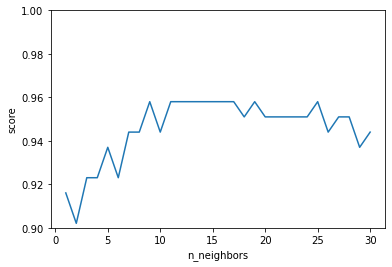

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

#1 . 데이터 로드
cancer = load_breast_cancer()
X = cancer.data
y= cancer.target

#2. 데이터 확인  
#print("데이터 수 = %d 특징량 = %d" % (X.shape[0], X.shape[1])) #(150,4) 
pd.DataFrame(X, columns=cancer.feature_names).head()

# 데이터 표시(목적 변수)
#print("데이터 수 = %d" % (y.shape[0]))
#print(y)

#3. 데이터 분할
X_train, X_test, y_train,y_test  = train_test_split(X,y, random_state = 0) 
#4.분류 모형 
list_nn =[]
list_score =[]
for k in range(1,31) : # 1~30 
    model = KNeighborsClassifier(n_neighbors =  k)
    model.fit(X_train, y_train)  # 학습 데이터로  모델 실행     
    y_pred  = model.predict(X_test)  # 테스트 데이터로 예측    
    score  = model.score(X_test, y_test) # 테스트 데이터로 평가 -> R2값이 1이면 완벽예측 , 0이면 평균
                                         # 분류 -> score  -> accuracy_score랑 같다.  
    print("[%d] score: {:.2f}".format(score) % k)
    
    list_nn.append(k)
    list_score.append(score)
    
#5. 시각화      
plt.ylim(0.9,1.0)   ; 
plt.xlabel('n_neighbors');
plt.ylabel('score');
plt.plot(list_nn, list_score);
#[평가 ]  k =1~30 /  k=9,  96% 정확도 
# * k값은  적은 수치도 문제가 없다. 


In [26]:
pd.DataFrame(X, columns=cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
print("데이터 수 = %d" % (y.shape[0]))
print(y)

데이터 수 = 569
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 